# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:06<00:00, 9.49KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [1]:
import helper
data_dir = './data'

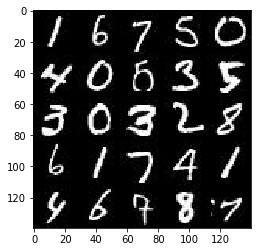

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

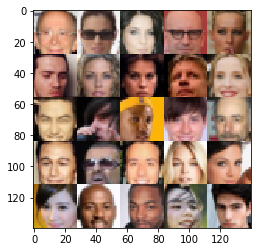

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_img  = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels) )
    z = tf.placeholder(tf.float32, (None, z_dim))
    learning_rate = tf.placeholder(tf.float32, (None))
    return input_img, z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [16]:
def discriminator(images, reuse=False, alpha=0.01):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse = reuse):
        
        start_conv_kernls = 64
        #input: 28x28x3
        #layer 1 
        x1 = tf.layers.conv2d(images,start_conv_kernls, 5, strides=2, padding='same')
        r1 = tf.maximum(alpha * x1, x1)  
        #output: 14x14x64
        #print(r1)
        #layer 2
        x2 = tf.layers.conv2d(r1,start_conv_kernls*2, 5, strides=2, padding='same')
        b2 = tf.layers.batch_normalization(x2, training = True)
        r2 = tf.maximum(alpha * b2, b2)
        #7x7x128
        #print(r2)
        #layer 3
        x3 = tf.layers.conv2d(r2,start_conv_kernls*4, 5, strides=2, padding='same')
        b3 = tf.layers.batch_normalization(x3, training = True)
        r3 = tf.maximum(alpha * b3, b3)
        #4x4x256
        #print(r3)
        #flatten            
        flat= tf.reshape(r3, (-1,4*4*start_conv_kernls*4))
        logits = tf.layers.dense(flat,1)
        out = tf.sigmoid(logits)        

        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [17]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        
        start_conv_kernls = 512
        #fc
        x0 = tf.layers.dense(z, 4*4*start_conv_kernls)
                
        #reshape
        x0 = tf.reshape(x0,(-1, 4,4,start_conv_kernls))
        x0 = tf.layers.batch_normalization(x0, training=is_train)
        x0 = tf.maximum(alpha * x0, x0)
        #4x4x512
        
        x1 = tf.layers.conv2d_transpose(x0, int(start_conv_kernls/2), 5, strides=2, padding='same')
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #8x8x256
        x1 = tf.image.resize_images(x1, [7,7])
        #7x7x256
        
        x2 = tf.layers.conv2d_transpose(x1, int(start_conv_kernls/4), 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x128
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        # 28x28xout_channel_dim
        
        out = tf.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [18]:
def model_loss(input_real, input_z, out_channel_dim, smooth=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)* (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [19]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    tvars = tf.trainable_variables()
    dvars = [var for var in tvars if var.name.startswith('discriminator')]
    gvars = [var for var in tvars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list=dvars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list=gvars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'   
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [21]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model   
    tf.reset_default_graph()
    
    #input_real, input_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    input_real, input_z, input_lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    d_opt, g_opt = model_opt(d_loss, g_loss, input_lr, beta1)
     
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps+=1
                # TODO: Train Model
                # Sample random noise for Z
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                batch_images = batch_images * 2
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, input_lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, input_lr:learning_rate})
                
                if steps % 10 == 0:
                    # get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})                
                    print("Epoch {}/{}..Batch {}/{}....".format(epoch_i+1, epoch_count, steps, int(data_shape[0]/batch_size)),
                              "Discriminator Loss: {:.4f}...".format(train_loss_d),
                              "Generator Loss: {:.4f}".format(train_loss_g))
                if steps % 100 == 0:
                    show_generator_output(sess,25,input_z,data_shape[3], data_image_mode)
                    #show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
        #saver.save(sess, './checkpoints/generator.ckpt')
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2..Batch 10/300.... Discriminator Loss: 0.3804... Generator Loss: 4.8477
Epoch 1/2..Batch 20/300.... Discriminator Loss: 4.5113... Generator Loss: 19.8195
Epoch 1/2..Batch 30/300.... Discriminator Loss: 1.2395... Generator Loss: 0.9095
Epoch 1/2..Batch 40/300.... Discriminator Loss: 0.5213... Generator Loss: 2.8389
Epoch 1/2..Batch 50/300.... Discriminator Loss: 0.4184... Generator Loss: 8.4331
Epoch 1/2..Batch 60/300.... Discriminator Loss: 0.4851... Generator Loss: 2.4986
Epoch 1/2..Batch 70/300.... Discriminator Loss: 0.5707... Generator Loss: 2.5559
Epoch 1/2..Batch 80/300.... Discriminator Loss: 0.9846... Generator Loss: 1.2604
Epoch 1/2..Batch 90/300.... Discriminator Loss: 0.7824... Generator Loss: 2.2738
Epoch 1/2..Batch 100/300.... Discriminator Loss: 0.6970... Generator Loss: 2.2149


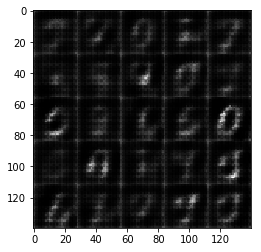

Epoch 1/2..Batch 110/300.... Discriminator Loss: 0.9739... Generator Loss: 3.3084
Epoch 1/2..Batch 120/300.... Discriminator Loss: 0.7622... Generator Loss: 1.5116
Epoch 1/2..Batch 130/300.... Discriminator Loss: 1.1036... Generator Loss: 2.6372
Epoch 1/2..Batch 140/300.... Discriminator Loss: 0.8586... Generator Loss: 1.5917
Epoch 1/2..Batch 150/300.... Discriminator Loss: 1.4314... Generator Loss: 3.7878
Epoch 1/2..Batch 160/300.... Discriminator Loss: 0.8866... Generator Loss: 1.9280
Epoch 1/2..Batch 170/300.... Discriminator Loss: 1.0131... Generator Loss: 1.4267
Epoch 1/2..Batch 180/300.... Discriminator Loss: 0.9303... Generator Loss: 2.1052
Epoch 1/2..Batch 190/300.... Discriminator Loss: 0.9365... Generator Loss: 1.0439
Epoch 1/2..Batch 200/300.... Discriminator Loss: 1.0006... Generator Loss: 1.0989


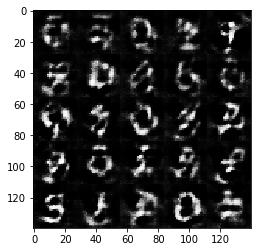

Epoch 1/2..Batch 210/300.... Discriminator Loss: 0.8597... Generator Loss: 1.9105
Epoch 1/2..Batch 220/300.... Discriminator Loss: 0.8599... Generator Loss: 1.5295
Epoch 1/2..Batch 230/300.... Discriminator Loss: 1.0772... Generator Loss: 0.8949
Epoch 1/2..Batch 240/300.... Discriminator Loss: 0.8644... Generator Loss: 2.0316
Epoch 1/2..Batch 250/300.... Discriminator Loss: 0.8774... Generator Loss: 1.4018
Epoch 1/2..Batch 260/300.... Discriminator Loss: 0.8998... Generator Loss: 2.0009
Epoch 1/2..Batch 270/300.... Discriminator Loss: 1.0376... Generator Loss: 0.8816
Epoch 1/2..Batch 280/300.... Discriminator Loss: 0.9361... Generator Loss: 1.9467
Epoch 1/2..Batch 290/300.... Discriminator Loss: 1.0736... Generator Loss: 0.8785
Epoch 1/2..Batch 300/300.... Discriminator Loss: 0.9286... Generator Loss: 1.4626


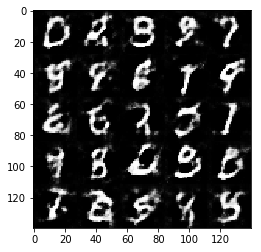

Epoch 2/2..Batch 10/300.... Discriminator Loss: 1.4248... Generator Loss: 3.0602
Epoch 2/2..Batch 20/300.... Discriminator Loss: 1.0326... Generator Loss: 0.8781
Epoch 2/2..Batch 30/300.... Discriminator Loss: 0.9030... Generator Loss: 1.7159
Epoch 2/2..Batch 40/300.... Discriminator Loss: 0.9769... Generator Loss: 1.0772
Epoch 2/2..Batch 50/300.... Discriminator Loss: 0.9771... Generator Loss: 1.8832
Epoch 2/2..Batch 60/300.... Discriminator Loss: 0.9203... Generator Loss: 1.2319
Epoch 2/2..Batch 70/300.... Discriminator Loss: 1.1635... Generator Loss: 0.7718
Epoch 2/2..Batch 80/300.... Discriminator Loss: 0.9103... Generator Loss: 1.5270
Epoch 2/2..Batch 90/300.... Discriminator Loss: 0.9621... Generator Loss: 1.0694
Epoch 2/2..Batch 100/300.... Discriminator Loss: 0.9822... Generator Loss: 0.9979


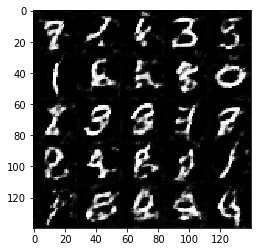

Epoch 2/2..Batch 110/300.... Discriminator Loss: 0.9764... Generator Loss: 1.1184
Epoch 2/2..Batch 120/300.... Discriminator Loss: 0.9720... Generator Loss: 1.6816
Epoch 2/2..Batch 130/300.... Discriminator Loss: 0.9428... Generator Loss: 1.1177
Epoch 2/2..Batch 140/300.... Discriminator Loss: 0.9660... Generator Loss: 1.4803
Epoch 2/2..Batch 150/300.... Discriminator Loss: 1.0636... Generator Loss: 0.8102
Epoch 2/2..Batch 160/300.... Discriminator Loss: 1.0874... Generator Loss: 2.3971
Epoch 2/2..Batch 170/300.... Discriminator Loss: 0.9211... Generator Loss: 1.4893
Epoch 2/2..Batch 180/300.... Discriminator Loss: 0.9766... Generator Loss: 0.9583
Epoch 2/2..Batch 190/300.... Discriminator Loss: 0.9687... Generator Loss: 1.7722
Epoch 2/2..Batch 200/300.... Discriminator Loss: 0.9837... Generator Loss: 1.2491


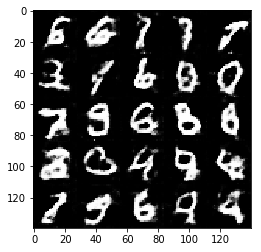

Epoch 2/2..Batch 210/300.... Discriminator Loss: 0.9719... Generator Loss: 1.1050
Epoch 2/2..Batch 220/300.... Discriminator Loss: 0.9323... Generator Loss: 1.7186
Epoch 2/2..Batch 230/300.... Discriminator Loss: 0.9453... Generator Loss: 1.0213
Epoch 2/2..Batch 240/300.... Discriminator Loss: 0.9418... Generator Loss: 1.2147
Epoch 2/2..Batch 250/300.... Discriminator Loss: 0.8466... Generator Loss: 1.3745
Epoch 2/2..Batch 260/300.... Discriminator Loss: 1.4670... Generator Loss: 2.0530
Epoch 2/2..Batch 270/300.... Discriminator Loss: 0.8918... Generator Loss: 1.3893
Epoch 2/2..Batch 280/300.... Discriminator Loss: 0.8625... Generator Loss: 1.2044
Epoch 2/2..Batch 290/300.... Discriminator Loss: 1.4482... Generator Loss: 0.5329
Epoch 2/2..Batch 300/300.... Discriminator Loss: 0.9029... Generator Loss: 1.1331


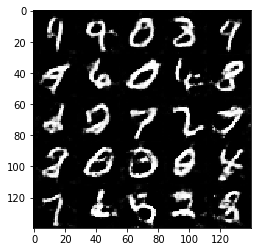

IndexError: list index out of range

In [22]:
batch_size = 200
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1..Batch 10/1350.... Discriminator Loss: 1.1285... Generator Loss: 0.9362
Epoch 1/1..Batch 20/1350.... Discriminator Loss: 0.6599... Generator Loss: 1.8961
Epoch 1/1..Batch 30/1350.... Discriminator Loss: 0.6202... Generator Loss: 2.2375
Epoch 1/1..Batch 40/1350.... Discriminator Loss: 0.5713... Generator Loss: 2.5762
Epoch 1/1..Batch 50/1350.... Discriminator Loss: 0.6357... Generator Loss: 2.0945
Epoch 1/1..Batch 60/1350.... Discriminator Loss: 0.4948... Generator Loss: 2.7422
Epoch 1/1..Batch 70/1350.... Discriminator Loss: 0.5848... Generator Loss: 2.0328
Epoch 1/1..Batch 80/1350.... Discriminator Loss: 0.5011... Generator Loss: 2.4432
Epoch 1/1..Batch 90/1350.... Discriminator Loss: 0.6050... Generator Loss: 3.5761
Epoch 1/1..Batch 100/1350.... Discriminator Loss: 0.7810... Generator Loss: 1.4169


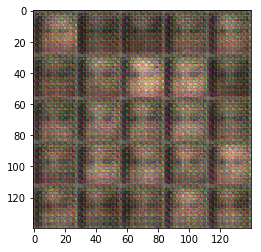

Epoch 1/1..Batch 110/1350.... Discriminator Loss: 0.8071... Generator Loss: 2.1711
Epoch 1/1..Batch 120/1350.... Discriminator Loss: 0.9134... Generator Loss: 2.6671
Epoch 1/1..Batch 130/1350.... Discriminator Loss: 1.1140... Generator Loss: 0.7765
Epoch 1/1..Batch 140/1350.... Discriminator Loss: 0.8896... Generator Loss: 1.3099
Epoch 1/1..Batch 150/1350.... Discriminator Loss: 0.9788... Generator Loss: 1.7847
Epoch 1/1..Batch 160/1350.... Discriminator Loss: 0.9036... Generator Loss: 2.5509
Epoch 1/1..Batch 170/1350.... Discriminator Loss: 0.9282... Generator Loss: 1.0984
Epoch 1/1..Batch 180/1350.... Discriminator Loss: 0.7890... Generator Loss: 1.5501
Epoch 1/1..Batch 190/1350.... Discriminator Loss: 1.0176... Generator Loss: 0.9513
Epoch 1/1..Batch 200/1350.... Discriminator Loss: 0.9286... Generator Loss: 1.0843


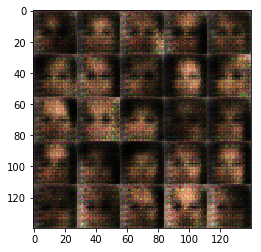

Epoch 1/1..Batch 210/1350.... Discriminator Loss: 0.8500... Generator Loss: 1.9871
Epoch 1/1..Batch 220/1350.... Discriminator Loss: 0.9560... Generator Loss: 1.5544
Epoch 1/1..Batch 230/1350.... Discriminator Loss: 1.0184... Generator Loss: 1.5748
Epoch 1/1..Batch 240/1350.... Discriminator Loss: 1.0408... Generator Loss: 0.9618
Epoch 1/1..Batch 250/1350.... Discriminator Loss: 0.8007... Generator Loss: 1.6333
Epoch 1/1..Batch 260/1350.... Discriminator Loss: 0.9228... Generator Loss: 2.0981
Epoch 1/1..Batch 270/1350.... Discriminator Loss: 0.7882... Generator Loss: 1.3533
Epoch 1/1..Batch 280/1350.... Discriminator Loss: 0.9089... Generator Loss: 1.3467
Epoch 1/1..Batch 290/1350.... Discriminator Loss: 0.8070... Generator Loss: 1.4196
Epoch 1/1..Batch 300/1350.... Discriminator Loss: 1.0748... Generator Loss: 0.8762


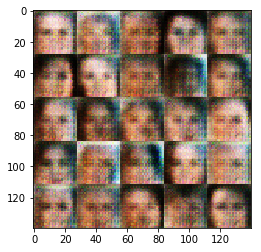

Epoch 1/1..Batch 310/1350.... Discriminator Loss: 0.9242... Generator Loss: 1.3607
Epoch 1/1..Batch 320/1350.... Discriminator Loss: 0.8255... Generator Loss: 1.5032
Epoch 1/1..Batch 330/1350.... Discriminator Loss: 0.8673... Generator Loss: 1.4323
Epoch 1/1..Batch 340/1350.... Discriminator Loss: 0.9134... Generator Loss: 1.4565
Epoch 1/1..Batch 350/1350.... Discriminator Loss: 0.9481... Generator Loss: 1.1897
Epoch 1/1..Batch 360/1350.... Discriminator Loss: 0.9739... Generator Loss: 0.9871
Epoch 1/1..Batch 370/1350.... Discriminator Loss: 0.7721... Generator Loss: 2.1004
Epoch 1/1..Batch 380/1350.... Discriminator Loss: 1.2436... Generator Loss: 0.6432
Epoch 1/1..Batch 390/1350.... Discriminator Loss: 0.8969... Generator Loss: 1.5839
Epoch 1/1..Batch 400/1350.... Discriminator Loss: 0.7527... Generator Loss: 2.2790


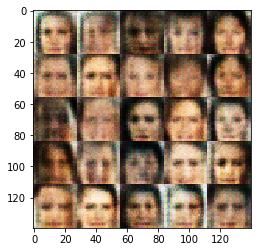

Epoch 1/1..Batch 410/1350.... Discriminator Loss: 0.7985... Generator Loss: 1.3172
Epoch 1/1..Batch 420/1350.... Discriminator Loss: 0.7675... Generator Loss: 1.7399
Epoch 1/1..Batch 430/1350.... Discriminator Loss: 0.9755... Generator Loss: 2.3434
Epoch 1/1..Batch 440/1350.... Discriminator Loss: 0.9118... Generator Loss: 1.8479
Epoch 1/1..Batch 450/1350.... Discriminator Loss: 0.9543... Generator Loss: 1.1102
Epoch 1/1..Batch 460/1350.... Discriminator Loss: 0.9769... Generator Loss: 1.1924
Epoch 1/1..Batch 470/1350.... Discriminator Loss: 0.8981... Generator Loss: 1.3039
Epoch 1/1..Batch 480/1350.... Discriminator Loss: 1.1646... Generator Loss: 0.9380
Epoch 1/1..Batch 490/1350.... Discriminator Loss: 1.1190... Generator Loss: 0.8003
Epoch 1/1..Batch 500/1350.... Discriminator Loss: 1.0859... Generator Loss: 1.0554


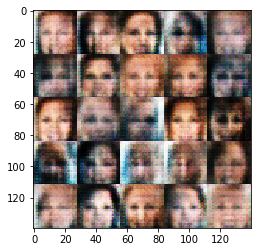

Epoch 1/1..Batch 510/1350.... Discriminator Loss: 1.0163... Generator Loss: 1.6667
Epoch 1/1..Batch 520/1350.... Discriminator Loss: 1.3055... Generator Loss: 0.6461
Epoch 1/1..Batch 530/1350.... Discriminator Loss: 0.9908... Generator Loss: 1.2481
Epoch 1/1..Batch 540/1350.... Discriminator Loss: 1.0272... Generator Loss: 1.5885
Epoch 1/1..Batch 550/1350.... Discriminator Loss: 1.0819... Generator Loss: 0.8711
Epoch 1/1..Batch 560/1350.... Discriminator Loss: 0.9636... Generator Loss: 1.1881
Epoch 1/1..Batch 570/1350.... Discriminator Loss: 0.9304... Generator Loss: 1.3191
Epoch 1/1..Batch 580/1350.... Discriminator Loss: 1.0180... Generator Loss: 1.6457
Epoch 1/1..Batch 590/1350.... Discriminator Loss: 0.9475... Generator Loss: 1.1394
Epoch 1/1..Batch 600/1350.... Discriminator Loss: 1.0335... Generator Loss: 1.7100


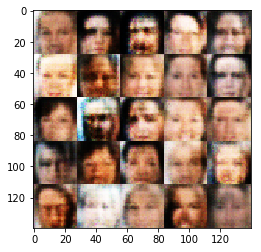

Epoch 1/1..Batch 610/1350.... Discriminator Loss: 1.0242... Generator Loss: 1.0679
Epoch 1/1..Batch 620/1350.... Discriminator Loss: 1.3167... Generator Loss: 0.5767
Epoch 1/1..Batch 630/1350.... Discriminator Loss: 0.9146... Generator Loss: 1.5499
Epoch 1/1..Batch 640/1350.... Discriminator Loss: 0.9684... Generator Loss: 1.1033
Epoch 1/1..Batch 650/1350.... Discriminator Loss: 0.9816... Generator Loss: 0.9643
Epoch 1/1..Batch 660/1350.... Discriminator Loss: 1.0232... Generator Loss: 1.8190
Epoch 1/1..Batch 670/1350.... Discriminator Loss: 0.9807... Generator Loss: 2.0133
Epoch 1/1..Batch 680/1350.... Discriminator Loss: 1.1683... Generator Loss: 2.0376
Epoch 1/1..Batch 690/1350.... Discriminator Loss: 0.9570... Generator Loss: 1.2155
Epoch 1/1..Batch 700/1350.... Discriminator Loss: 0.9316... Generator Loss: 1.7050


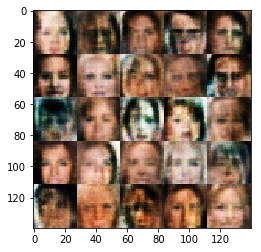

Epoch 1/1..Batch 710/1350.... Discriminator Loss: 1.1313... Generator Loss: 0.7722
Epoch 1/1..Batch 720/1350.... Discriminator Loss: 1.0002... Generator Loss: 0.9828
Epoch 1/1..Batch 730/1350.... Discriminator Loss: 1.0406... Generator Loss: 0.9586
Epoch 1/1..Batch 740/1350.... Discriminator Loss: 0.9590... Generator Loss: 1.1348
Epoch 1/1..Batch 750/1350.... Discriminator Loss: 1.0709... Generator Loss: 0.8201
Epoch 1/1..Batch 760/1350.... Discriminator Loss: 0.9898... Generator Loss: 0.9359
Epoch 1/1..Batch 770/1350.... Discriminator Loss: 1.2156... Generator Loss: 0.7074
Epoch 1/1..Batch 780/1350.... Discriminator Loss: 0.8596... Generator Loss: 1.3197
Epoch 1/1..Batch 790/1350.... Discriminator Loss: 1.0289... Generator Loss: 1.8859
Epoch 1/1..Batch 800/1350.... Discriminator Loss: 0.9536... Generator Loss: 1.4025


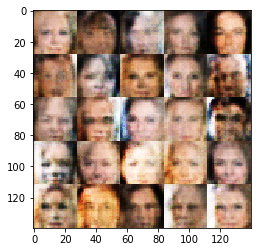

Epoch 1/1..Batch 810/1350.... Discriminator Loss: 0.8940... Generator Loss: 1.5005
Epoch 1/1..Batch 820/1350.... Discriminator Loss: 1.0613... Generator Loss: 0.8358
Epoch 1/1..Batch 830/1350.... Discriminator Loss: 0.8499... Generator Loss: 1.9241
Epoch 1/1..Batch 840/1350.... Discriminator Loss: 1.0224... Generator Loss: 0.9819
Epoch 1/1..Batch 850/1350.... Discriminator Loss: 0.8432... Generator Loss: 1.3612
Epoch 1/1..Batch 860/1350.... Discriminator Loss: 1.0132... Generator Loss: 1.1028
Epoch 1/1..Batch 870/1350.... Discriminator Loss: 0.8576... Generator Loss: 1.2832
Epoch 1/1..Batch 880/1350.... Discriminator Loss: 1.0793... Generator Loss: 2.2449
Epoch 1/1..Batch 890/1350.... Discriminator Loss: 0.7878... Generator Loss: 1.5474
Epoch 1/1..Batch 900/1350.... Discriminator Loss: 1.0178... Generator Loss: 1.6783


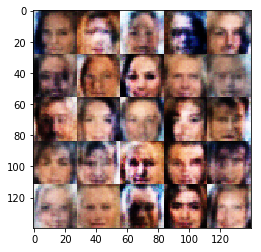

Epoch 1/1..Batch 910/1350.... Discriminator Loss: 0.9363... Generator Loss: 1.0053
Epoch 1/1..Batch 920/1350.... Discriminator Loss: 0.9352... Generator Loss: 1.4800
Epoch 1/1..Batch 930/1350.... Discriminator Loss: 1.2921... Generator Loss: 0.6322
Epoch 1/1..Batch 940/1350.... Discriminator Loss: 1.0131... Generator Loss: 1.0670
Epoch 1/1..Batch 950/1350.... Discriminator Loss: 1.1982... Generator Loss: 0.6974
Epoch 1/1..Batch 960/1350.... Discriminator Loss: 0.8516... Generator Loss: 1.2551
Epoch 1/1..Batch 970/1350.... Discriminator Loss: 0.9263... Generator Loss: 1.0852
Epoch 1/1..Batch 980/1350.... Discriminator Loss: 1.0040... Generator Loss: 0.9018
Epoch 1/1..Batch 990/1350.... Discriminator Loss: 0.8674... Generator Loss: 1.3790
Epoch 1/1..Batch 1000/1350.... Discriminator Loss: 0.8440... Generator Loss: 2.3799


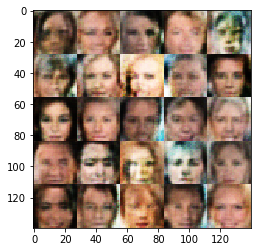

Epoch 1/1..Batch 1010/1350.... Discriminator Loss: 0.8847... Generator Loss: 1.8214
Epoch 1/1..Batch 1020/1350.... Discriminator Loss: 1.1535... Generator Loss: 2.0526
Epoch 1/1..Batch 1030/1350.... Discriminator Loss: 0.8562... Generator Loss: 1.7243
Epoch 1/1..Batch 1040/1350.... Discriminator Loss: 1.1934... Generator Loss: 2.3718
Epoch 1/1..Batch 1050/1350.... Discriminator Loss: 1.0072... Generator Loss: 1.4620
Epoch 1/1..Batch 1060/1350.... Discriminator Loss: 1.1578... Generator Loss: 0.7053
Epoch 1/1..Batch 1070/1350.... Discriminator Loss: 0.9751... Generator Loss: 1.2730
Epoch 1/1..Batch 1080/1350.... Discriminator Loss: 0.8399... Generator Loss: 1.3664
Epoch 1/1..Batch 1090/1350.... Discriminator Loss: 0.8392... Generator Loss: 1.7117
Epoch 1/1..Batch 1100/1350.... Discriminator Loss: 0.8015... Generator Loss: 1.4889


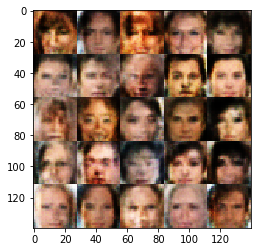

Epoch 1/1..Batch 1110/1350.... Discriminator Loss: 0.9290... Generator Loss: 1.0428
Epoch 1/1..Batch 1120/1350.... Discriminator Loss: 0.9435... Generator Loss: 1.1952
Epoch 1/1..Batch 1130/1350.... Discriminator Loss: 1.0040... Generator Loss: 1.1622
Epoch 1/1..Batch 1140/1350.... Discriminator Loss: 1.0107... Generator Loss: 0.9275
Epoch 1/1..Batch 1150/1350.... Discriminator Loss: 1.0340... Generator Loss: 2.0511
Epoch 1/1..Batch 1160/1350.... Discriminator Loss: 1.1150... Generator Loss: 0.8404
Epoch 1/1..Batch 1170/1350.... Discriminator Loss: 0.9331... Generator Loss: 1.0923
Epoch 1/1..Batch 1180/1350.... Discriminator Loss: 1.1019... Generator Loss: 1.4092
Epoch 1/1..Batch 1190/1350.... Discriminator Loss: 1.0746... Generator Loss: 0.8212
Epoch 1/1..Batch 1200/1350.... Discriminator Loss: 0.9896... Generator Loss: 0.9519


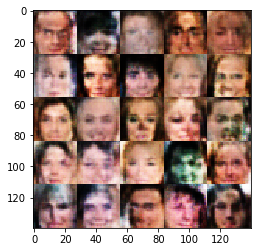

Epoch 1/1..Batch 1210/1350.... Discriminator Loss: 1.0428... Generator Loss: 1.1983
Epoch 1/1..Batch 1220/1350.... Discriminator Loss: 0.8549... Generator Loss: 1.6899
Epoch 1/1..Batch 1230/1350.... Discriminator Loss: 1.4228... Generator Loss: 0.5135
Epoch 1/1..Batch 1240/1350.... Discriminator Loss: 0.9528... Generator Loss: 1.3994
Epoch 1/1..Batch 1250/1350.... Discriminator Loss: 0.9347... Generator Loss: 1.2220
Epoch 1/1..Batch 1260/1350.... Discriminator Loss: 0.9272... Generator Loss: 1.0199
Epoch 1/1..Batch 1270/1350.... Discriminator Loss: 0.9046... Generator Loss: 1.2147
Epoch 1/1..Batch 1280/1350.... Discriminator Loss: 0.8736... Generator Loss: 1.7762
Epoch 1/1..Batch 1290/1350.... Discriminator Loss: 1.0455... Generator Loss: 0.9739
Epoch 1/1..Batch 1300/1350.... Discriminator Loss: 0.8344... Generator Loss: 1.4963


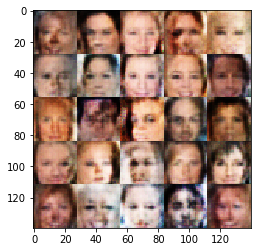

Epoch 1/1..Batch 1310/1350.... Discriminator Loss: 0.9954... Generator Loss: 0.9523
Epoch 1/1..Batch 1320/1350.... Discriminator Loss: 1.1055... Generator Loss: 0.7672
Epoch 1/1..Batch 1330/1350.... Discriminator Loss: 0.9505... Generator Loss: 1.1331
Epoch 1/1..Batch 1340/1350.... Discriminator Loss: 1.5184... Generator Loss: 0.4550
Epoch 1/1..Batch 1350/1350.... Discriminator Loss: 1.0196... Generator Loss: 1.6705


IndexError: list index out of range

In [23]:
batch_size = 150
z_dim = 150
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.